In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image.shape

(28, 28)

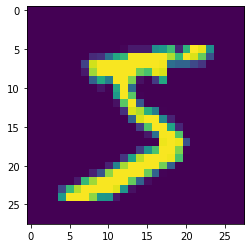

In [7]:
plt.imshow(single_image)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train.shape

(60000,)

In [10]:
y_example = to_categorical(y_train)

In [11]:
y_example.shape

(60000, 10)

In [12]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [16]:
x_train = x_train/255

In [17]:
x_test = x_test/255

In [18]:
#batch size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [19]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

# input shape, size of images
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding="valid", input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

#flatten the image somewhere on the model
model.add(Flatten())

model.add(Dense(128, activation="relu"))

#output - multiclass, softmax. 10 classes
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor="val_loss", patience=1)

In [27]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1373 - accuracy: 0.9579 - val_loss: 0.0551 - val_accuracy: 0.9834
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0413 - val_accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0604 - val_accuracy: 0.9794


In [28]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.137310,0.957950,0.055136,0.9834
1,0.045991,0.985967,0.041286,0.9850
2,0.028539,0.990867,0.060408,0.9794


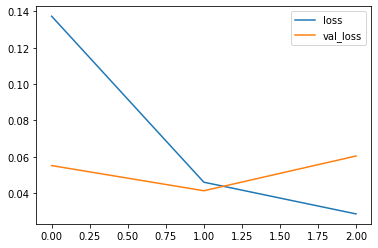

In [29]:
metrics[["loss", "val_loss"]].plot()

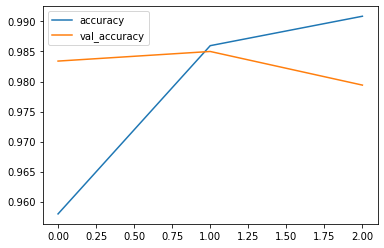

In [30]:
metrics[["accuracy", "val_accuracy"]].plot()

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.06040826439857483, 0.9793999791145325]

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [35]:
y_cat_test.shape

(10000, 10)

In [36]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.94      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       1.00      0.95      0.97      1028
           8       0.96      0.99      0.98       974
           9       0.92      0.99      0.95      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [38]:
print(confusion_matrix(y_test, predictions))

[[ 970    0    1    1    0    2    5    0    1    0]
 [   0 1128    1    0    0    0    1    0    5    0]
 [   2    2 1009    0    1    0    4    3   11    0]
 [   0    0    0 1000    0    2    0    0    5    3]
 [   1    0    0    0  919    0    3    0    7   52]
 [   2    0    1    6    0  868    5    0    0   10]
 [   1    1    0    0    1    1  950    0    4    0]
 [   0    2   14    1    0    1    0  980    5   25]
 [   1    0    0    0    0    1    2    0  967    3]
 [   1    0    0    0    1    1    0    0    3 1003]]


In [39]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


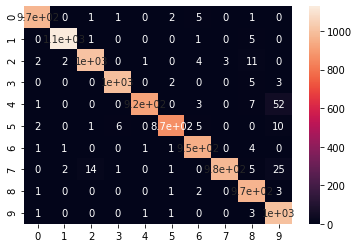

In [41]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [42]:
my_number = x_test[0]

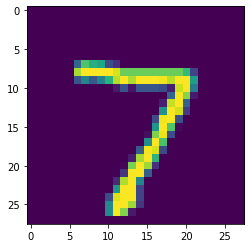

In [43]:
plt.imshow(my_number.reshape(28,28))

In [44]:
# reshape: num_images, width, height, color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])